# 公開されている実装を動かす



## Faster R-CNNを動かす
https://github.com/duckrabbits/ObjectDetection/tree/master
### 【問題1】学習と推定
下はアウトプットの結果ですが、学習が足りずバウンディングボックスが表示されませんでした。
エポック=１　iter=100

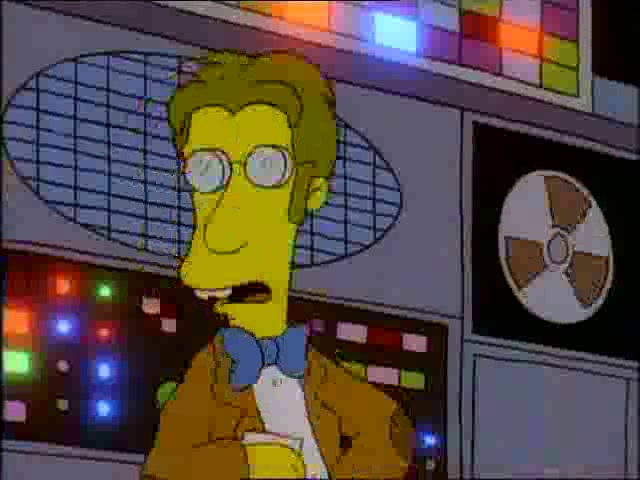

In [2]:
from IPython.display import Image, display_png
display_png(Image("/Users/morio/diveintocode-ml/sprint18/ObjectDetection/output/result_pic_0008.jpg.png"))

### 【問題2】論文と実装の対応
### モデルのベースは何か
faster_rcnn.get_modelでモデルの作成

resnetがベースである。　model.resnet.py

### RPNを実現しているコードはどこか

##### model.resnet.rpn

x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)

x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

##### model.faster_rcnn.get_model

model_rpn.compile(optimizer=Adam(lr=1e-4), loss=[losses.rpn_loss_cls(num_anchors), losses.rpn_loss_regr(num_anchors)])

##### model.lossesでrpnのloss関数を定義

def rpn_loss_regr　

def rpn_loss_cls

### RoIプーリングを実現しているコードはどこか
#### faster_rcnn.get_model
classifier = nn.classifier(shared_layers, roi_input, C.num_rois, nb_classes=len(classes_count), trainable=True)
##### model.resnet.classifier
out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])
#### model.RoiPoolingConv.RoiPoolingConv　ここに中身


 ## 【問題3】学習済みの重みによる推定
 スリッパをなぜかテディベアと認識している

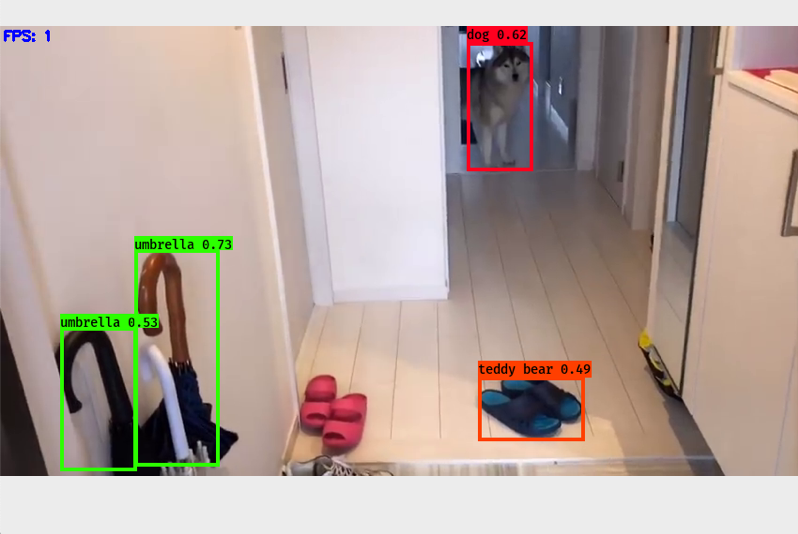

In [1]:
from IPython.display import Image, display_png
display_png(Image("/Users/morio/diveintocode-ml/sprint18/keras-yolo3/inuyolo3.png"))

## 【問題4】学習のためのファイルを作成

In [4]:
#アノテーションデータを書き換える
import pandas as pd

In [47]:
 df = pd.read_csv("/Users/morio/diveintocode-ml/sprint18/keras-yolo3/annotation.txt", header=None)

In [48]:
df.head()

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson


In [49]:
a = pd.factorize(df[5])

In [50]:
df.iloc[:, 5] = a[0]

In [51]:
df.head()

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0


In [52]:
df[6] = 0

In [66]:
for i in range(df.shape[0]):
    df.iloc[i, 6] = df.iloc[i, 0] + " " + str(df.iloc[i, 1]) + "," + str(df.iloc[i, 2]) + "," + str(df.iloc[i, 3]) + "," + str(df.iloc[i, 4]) + "," + str(df.iloc[i, 5])

In [89]:
df[6].to_csv("anoteshion.text", index=None, sep='"') #sepやると”消せる

## 【問題5】学習

predictまでやりましたが学習が足りないためかバウンディングが表示されなかった。

<img src="gakusyu.png">